## Example workflow for a linear regression 
based on: https://www.datacamp.com/tutorial/sklearn-linear-regression

## Assumptions of the regression model

1. The data points are independent of each other
2. There is a linear dependency between feature and target
3. The residuals are normally distributed
4. The residuals have a constant Variance
5. The features are independently of each other

In [1]:
# Import the libraries to analyse the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The dataset
For this example we are using the 'California Housing' dataset of scikit-learn

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target #Median house values in 100.000$
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA
A small EDA, so that we get a better understanding of the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Check for assumptions

### 1. Assumption: The data points are independent of each other
- This is rather hard to check with code alone
- This always needs some domain knowledge, so that you can understand, how the data was collected
- In this case, we can assume, that the assumption is hitted

### 2. Assumption: There is a linear dependency between feature and target
- The relationship between each feature and the target should be approx. linear
- You can do that by creating a scatterplot to have a look at the variables

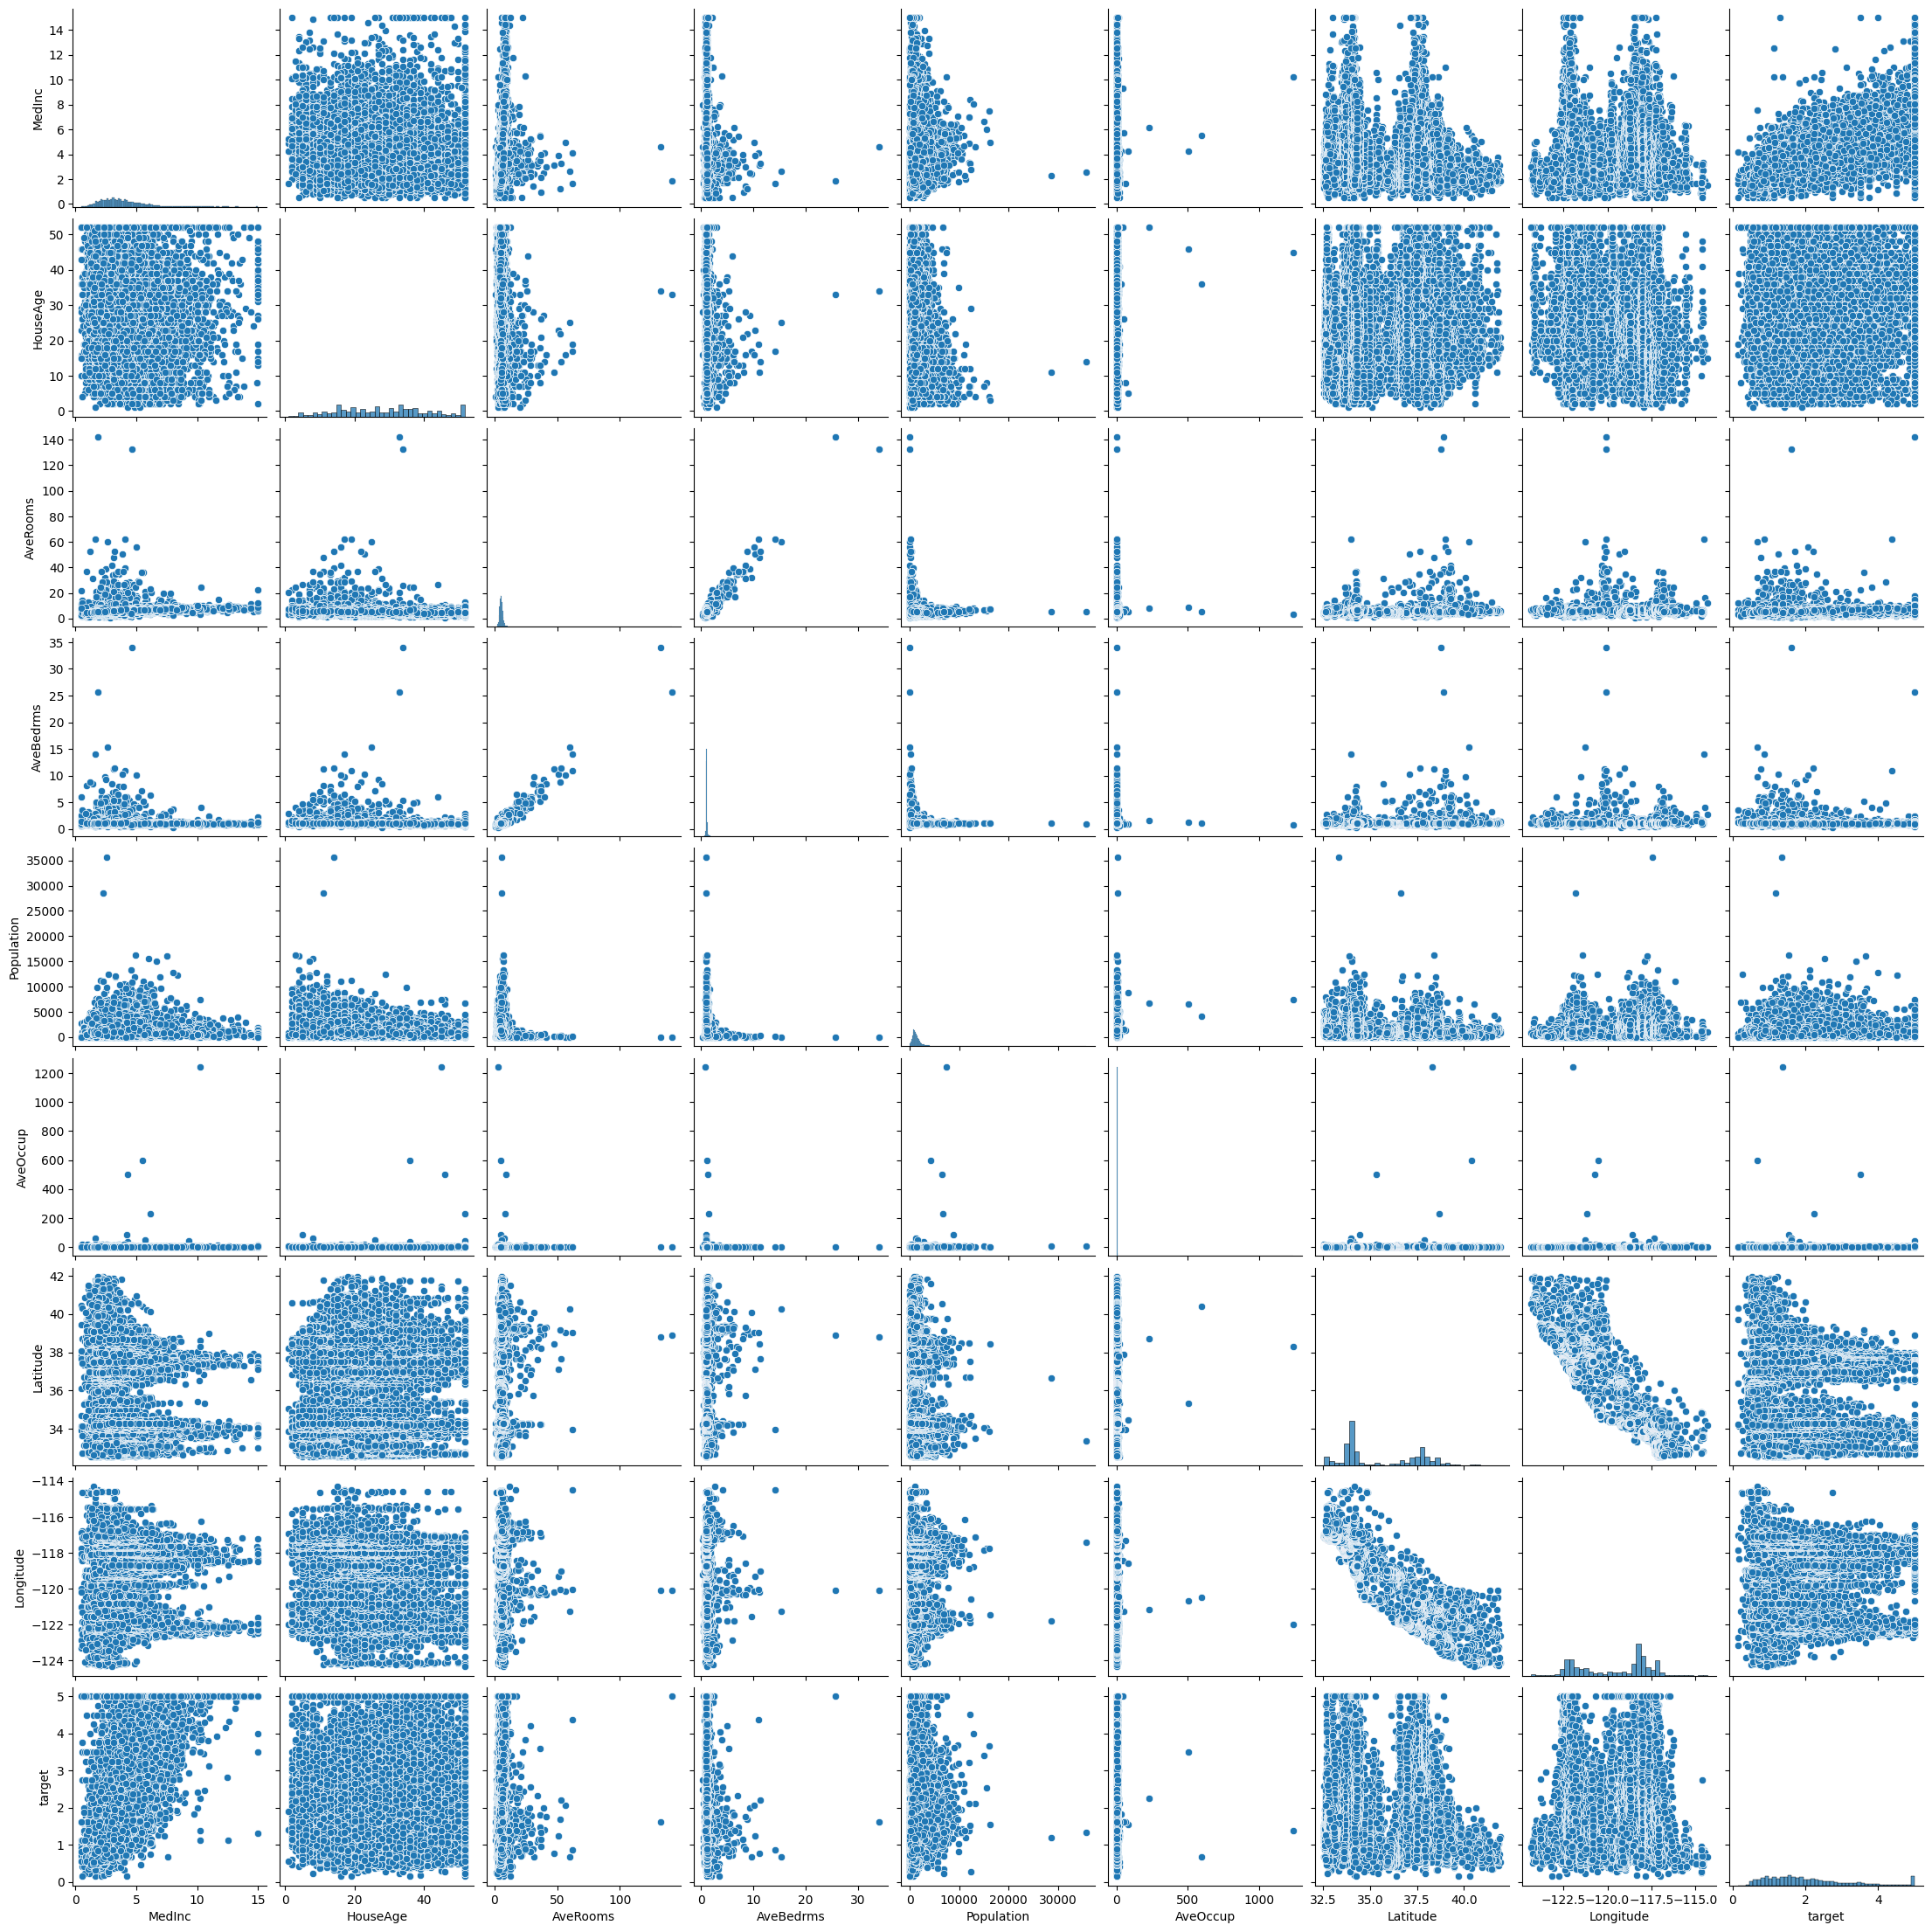

In [20]:
sns.pairplot(df)

- some of the features show a linear dependency to the target value
- some (like longitude and latitude) seem to be in a non linear dependency
- we can keep that in mind for future improvements

### 3. The residuals are normally distributed
- We can calculate the residuals of the model
- After that we can plot the graph to check for a normal distribution

Text(0, 0.5, 'Frequency')

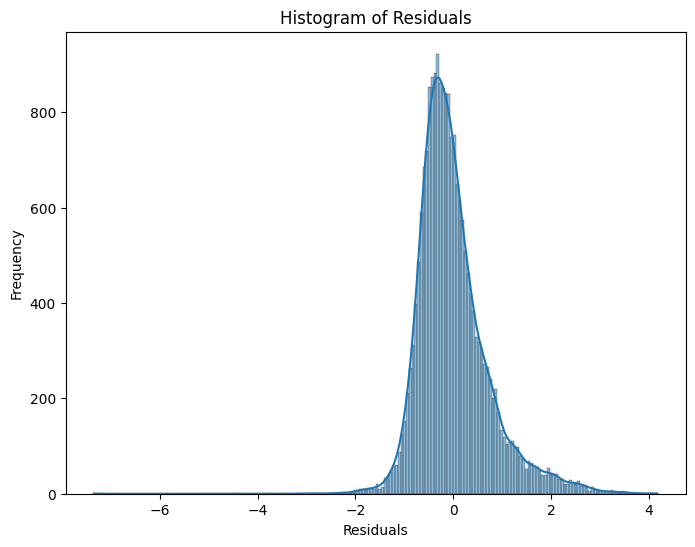

In [22]:
X = housing.data # Features
y = housing.target # Target

# Fit a linear regression model to get residuals
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

- As the graph shows, the residuals are normally distributed

### 4. The residuals have a constant Variance
- We can plot the residuals against a zero line to check for the variance
- the variance should be around the same area around the zero line

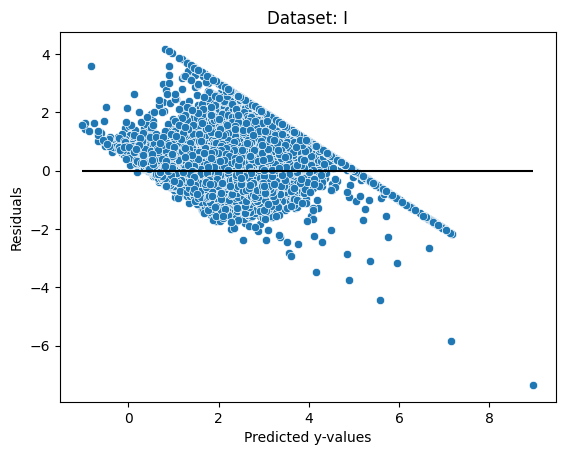

In [23]:
fig, ax = plt.subplots()

sns.scatterplot(x=predictions,
                y=residuals,
                ax=ax)
    
# labels
ax.set(xlabel='Predicted y-values',
       ylabel='Residuals',
       title='Dataset: I')
    
# zero line
ax.hlines(y=0,
          xmin=predictions.min(),
          xmax=predictions.max(),
          color='black')

- the residual graph shows a falling structure
- this indicates, that another model type could perform better on the data
- we will check with the linear regression, but this might indicate a poor model performance

### 5. The features are independent of each other
- As you can see in the correlation heatmap, the features are not highly correlated (besides longitude and latitude)


<Axes: >

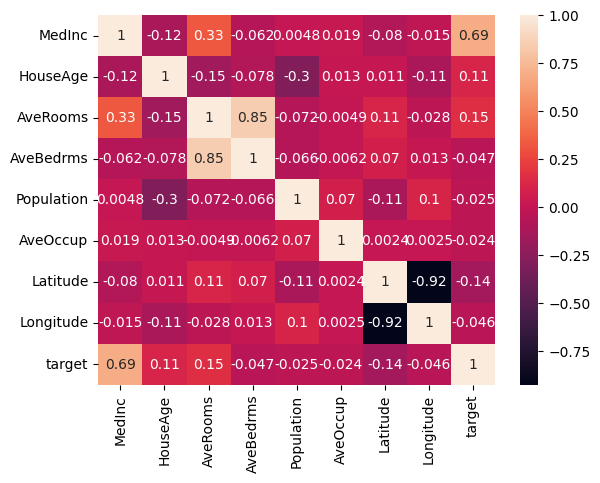

In [18]:
sns.heatmap(df.corr(), annot=True)

## Preparing the data
- After the small EDA, we need to prepare the data for the machine learning work

In [24]:
# crate the feature X and target y
# X needs to be a dataframe and y a series

X = df.drop(columns=['target'])
y = df['target']

In [25]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
# Now we can split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# As we saq in the EDA, the data is not in the same range
# Therefore we need to scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the model

In [28]:
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

## Evaluating the model performance

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("EVALUATION METRICS")
print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

EVALUATION METRICS
R2: 0.5758
MSE: 0.5559
RMSE: 0.7456


## Extracting model insights

In [30]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 2.071946937378881

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


Text(0, 0.5, 'Predicted Prices (in $100,000s)')

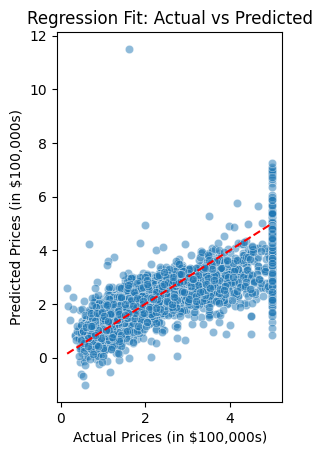

In [ ]:
# Plot: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")

## Future steps that can be done, for a better model performance

- Enhanced feature selection (Longitude, Latitude)
- Feature Engineering
- Testing other models